Realizado por Cristian Andrès Gonzalez Rojas y Valentina Rodriguez Hernandez

In [1]:
#Importando librerias #######
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar en una lista y en el siguiente orden:

* A) cantidad de columnas
* B) Nombre de las columnas
* C) número de registros no NaN de cada columna
* D) cantidad total de memoria usada para cargar el set en el computador ,( df.memory_usage() )
* E) Estadistica basica para cada columna, media, desviacion estandar, maximo
* F) Remplazar los NaN por None



In [2]:
##lectura del archivo CSV
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRq5AbjJxjx164mk6EkEFwROJPFApt077p6W4F68fsmOQAY2c9QrI24QOxEUz25ABc84CXIuEp4mUuo/pub?output=csv"
df = pd.read_csv(path)


In [3]:
del df['Unnamed: 1']
df

Date  Berri1  Maisonneuve_1  Maisonneuve_2  Brebeuf
0    01/01/2009      29             20             35      NaN
1    02/01/2009      19              3             22      NaN
2    03/01/2009      24             12             22      NaN
3    04/01/2009      24              8             15      NaN
4    05/01/2009     120            111            141      NaN
..          ...     ...            ...            ...      ...
360  27/12/2009      66             29             52      0.0
361  28/12/2009      61             41             99      0.0
362  29/12/2009      89             52            115      0.0
363  30/12/2009      76             43            115      0.0
364  31/12/2009      53             46            112      0.0

[365 rows x 5 columns]

In [4]:
#crear la funcion para el 1 punto 
def PS4_1(path):
  dfp1 = pd.read_csv(path)
  # A) 
  a = len(df.columns)
  # B) 
  b = df.columns 
  # C)
  c = len(df.axes[0])-df.isnull().sum() 
  # D)
  d = df.memory_usage() 
  # E)
  e = df.describe() 
  # F)
  f = df.fillna('None') 
  # se genera un diccionario
  dic = {"A) cantidad de columnas": a, "B). nombre de las columnas": b, "C). número de registros no NaN de cada columna": c, 
       "D). cantidad total de memoria usada": d, "E). estadística básica": e, "F). reemplazo de NaN por None": f} 
  return dic
PS4_1(path) 

{'A) cantidad de columnas': 5,
 'B). nombre de las columnas': Index(['Date', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf'], dtype='object'),
 'C). número de registros no NaN de cada columna': Date             365
 Berri1           365
 Maisonneuve_1    365
 Maisonneuve_2    365
 Brebeuf          178
 dtype: int64,
 'D). cantidad total de memoria usada': Index             128
 Date             2920
 Berri1           2920
 Maisonneuve_1    2920
 Maisonneuve_2    2920
 Brebeuf          2920
 dtype: int64,
 'E). estadística básica':             Berri1  Maisonneuve_1  Maisonneuve_2      Brebeuf
 count   365.000000     365.000000     365.000000   178.000000
 mean   2032.200000    1060.252055    2093.169863  2576.359551
 std    1878.879799    1079.533086    1854.368523  2484.004743
 min       0.000000       0.000000       0.000000     0.000000
 25%     194.000000      90.000000     228.000000     0.000000
 50%    1726.000000     678.000000    1686.000000  1443.500000
 75%    3540.000

# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

In [5]:
"""Este código retorna información acerca del DataFrame Crimes_2019"""
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSMl_AFNVkGZ_dQJLpFOYY5NbdjUdqYCe5HfGfg6vgYhtWC9QN0NJRqy34uH7DJ0LakUU0IQ67YPfMW/pub?output=csv"
dfcrimen = pd.read_csv(path)
dfcrimen


Unnamed: 0        Primary Type                    Date
0             0  DECEPTIVE PRACTICE  09/24/2019 08:00:00 AM
1             1               THEFT  10/13/2019 08:30:00 PM
2             2               THEFT  10/05/2019 06:30:00 PM
3             3     CRIMINAL DAMAGE  10/13/2019 07:00:00 PM
4             4             ASSAULT  10/13/2019 02:10:00 PM
..          ...                 ...                     ...
995         995       OTHER OFFENSE  10/14/2019 10:47:00 PM
996         996             BATTERY  10/14/2019 04:00:00 AM
997         997               THEFT  10/14/2019 10:25:00 AM
998         998               THEFT  10/14/2019 07:00:00 PM
999         999             ROBBERY  10/14/2019 04:10:00 PM

[1000 rows x 3 columns]

 1.estadistica general del dataframe: 
         Unnamed: 0
count  1000.000000
mean    499.500000
std     288.819436
min       0.000000
25%     249.750000
50%     499.500000
75%     749.250000
max     999.000000 
 
 2.dejar las columnas PrimaryType, y Date:
                        Date        Primary Type
0    09/24/2019 08:00:00 AM  DECEPTIVE PRACTICE
1    10/13/2019 08:30:00 PM               THEFT
2    10/05/2019 06:30:00 PM               THEFT
3    10/13/2019 07:00:00 PM     CRIMINAL DAMAGE
4    10/13/2019 02:10:00 PM             ASSAULT
..                      ...                 ...
995  10/14/2019 10:47:00 PM       OTHER OFFENSE
996  10/14/2019 04:00:00 AM             BATTERY
997  10/14/2019 10:25:00 AM               THEFT
998  10/14/2019 07:00:00 PM               THEFT
999  10/14/2019 04:10:00 PM             ROBBERY

[1000 rows x 2 columns] 
 
 3.transformar la columna Date:  
 
 0     2019-09-24 08:00:00
1     2019-10-13 20:30:00
2     2019-10-05 18:30:00
3     2019-10-13 19:00:

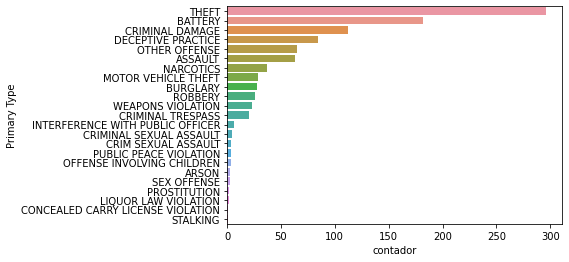

In [6]:
#creación de dataframe
X = pd.DataFrame() 
Y = pd.DataFrame()
#asigno las series 
X['Date'],X['Primary Type'] = dfcrimen['Date'],dfcrimen['Primary Type'] #asignación de las series 
Y['Primary Type'] = dfcrimen['Primary Type']
print(" 1.estadistica general del dataframe: \n",dfcrimen.describe(),"\n","\n", #primer subpunto
    #segundo subpunto
      "2.dejar las columnas PrimaryType, y Date:\n",X,"\n","\n", 
    #tercer subpunto
      "3.transformar la columna Date: ","\n","\n",  pd.to_datetime(dfcrimen.Date,format="%m/%d/%Y %I:%M:%S %p"),"\n","\n", 
    #cuarto subpunto
      "4.casos totales para cada tipo de crimen de forma ascendente: \n", X.groupby('Primary Type').Date.count().sort_values(), "\n","\n", 
    #quinto subpunto
      "5.los valores por orden alfabetico de Primary type:", Y.sort_values(by=['Primary Type']),"\n","\n", 
    #sexto subpunto
      "6.la fila 100 a la 120:",X.iloc[100:121]) 
#septimo subpunto 
datos = dfcrimen.groupby("Primary Type").Date.count().sort_values(ascending=False) 
datos = datos.reset_index()
datos = datos.rename(columns={"Date":"contador"})
ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]

In [7]:

#lectura del archivo CSV
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vSfBl3kii5eJ2mhYt_jW-cSwiJwdNDgTXZcgiN_XeTd4e7b2MomSjJDwjpRliJ0yMkl8w31b0M4vsOS/pub?output=csv"

#Modificacion de datos
datos= pd.read_csv(path, index_col="country")
datos.fillna(0)
datos_importantes = datos[["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]]

#Comparacion con los paises latinoamericanos:
latinoamerica= ["Argentina","Bolivia","Chile","Colombia","Costa Rica","Ecuador","El Salvador","Guatemala","Honduras","Mexico","Panama","Paraguay","Peru","Dominican Republic","Uruguay","Venezuela"]

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]

#Tratamiento de los tipos de datos de la tabla
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["total_vaccinations"].max()
  list1.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_vaccinated"].max()
  list2.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_fully_vaccinated"].max()
  list3.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["daily_vaccinations_raw"].mean()
  list4.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["daily_vaccinations"].mean()
  list5.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["total_vaccinations_per_hundred"].mean()
  list6.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_vaccinated_per_hundred"].mean()
  list7.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_fully_vaccinated_per_hundred"].mean()
  list8.append(num)
for t in latinoamerica:
  df = datos_importantes.loc[t]
  num = df["daily_vaccinations_per_million"].mean()
  list9.append(num)

#creacion de un DataFrame con los resultados obtenidos de toda Latinoamerica, para poder comparar los resultados entre ellos mismos
dic=[]
dtf=[]


for i in range(0,16,1):
  dic={
          "total_vaccinations":list1[i],
          "people_vaccinated":list2[i],
          "people_fully_vaccinated":list3[i],
          "daily_vaccinations_raw":list4[i],
          "daily_vaccinations":list5[i],
          "total_vaccinations_per_hundred":list6[i],
          "people_vaccinated_per_hundred":list7[i],
          "people_fully_vaccinated_per_hundred":list8[i],
          "daily_vaccinations_per_million":list9[i]
          }
  dtf.append(dic)

dtff = pd.DataFrame(dtf)
dtff.index=latinoamerica
print(dtff)

#Determinar el numero de vacunados en el intervalo [1.5E6, 2.0E6], "millon y medio y dos millones de vacunados".

dtffintervalo1 = dtff[dtff["total_vaccinations"]>=(1.5*10**6)]
dtffintervalo2 = dtffintervalo1[dtffintervalo1["total_vaccinations"]<=(2*10**6)]
print("Los pais/paises con el numero de vacunados en el intervalo [1.5E6, 2.0E6] es/son:")
print(dtffintervalo2)

#Creacion de un CSV con los datos de Colombia
datos_filtrados = datos.loc["Colombia"]
datos_filtrados.to_csv("DatosColombia")


                    total_vaccinations  ...  daily_vaccinations_per_million
Argentina                    4771214.0  ...                      973.680000
Bolivia                       378455.0  ...                      418.768116
Chile                       11396072.0  ...                     5534.826923
Colombia                     2691513.0  ...                      996.816327
Costa Rica                    504930.0  ...                      877.417476
Ecuador                       356783.0  ...                      230.786667
El Salvador                   160000.0  ...                      461.285714
Guatemala                     127945.0  ...                      164.268293
Honduras                       52772.0  ...                      144.588235
Mexico                      10642873.0  ...                      700.438095
Panama                        456929.0  ...                     1198.949367
Paraguay                       48684.0  ...                      148.377778
Peru        